# Used Car Project

## Project Description
I retrieved my data from Kaggle: https://www.kaggle.com/datasets/ananaymital/us-used-cars-dataset 
This is a large dataset about used cars. I will be creating a machine learning model to predict the price of used cars.

## Goals
- To discover the drivers of value of cars
- Use the drivers to develop a ML model that determines the value of cars
- Deliever a report to a technical data science team

In [1]:
import wrangle as w
import functions as f
import prepare as p

## Acquire
- data gathered from the Kaggle
- each row represents a vehicle
- each column represents a feature of the vehicle
- the data gathered from the database started at 3 million rows and 66 columns

## Prepare

### Prepare Actions:
- Removed columns that did not contain useful information
- Removed null values
- Checked that column data types were appropriate
- Split data into train, validate and test (approx. 60/20/20), stratifying on 'price'

## Data Dictionary

| Target Variable | Definition|
|-----------------|-----------|
| price | The total price of the vehicle |

| Feature  | Definition |
|----------|------------|
| back_legroom |  Legroom in the rear seat |
| body_type | Body type of the vehicle (Hatchback, Sedan, Convertible, etc.) |
| city | City where the car is listed |
| city_mpg | Fuel economy in city traffic (km/L) |
| daysonmarket | Number of days since vehicle was listed |
| cyl | Engine configuration (I4, V6, etc.) |
| displ | Engine displacement |
| dealer | Whether the seller is a dealer |
| front_legroom | Legroom for inches in the passenger seat |
| tank_size | Fuel tank's max capacity in gallons |
| fuel_type | Dominant type of fuel used in vehicle |
| accidents | Whether the vin has any accidents registered |
| hiway_mpg | Fuel economy in highway traffic (km/L) |
| horsepower | Horsepower of the vehicle |
| new | Whether the vehicle is new |
| length | Length of vehicle in inches |
| listed_date | Date the vehicle was first listed |
| model | Model of the car |
| seats | Number of seats in the vehicle |
| mileage | The odometer reading on the vehicle |
| owners | Number of owneres the vehicle has had |
| seller_rating | Rating of the seller |
| tran | Transmission type of the vehicle (Manual, Auto, etc.) |
| drive_type | The drive train of the vehicle (FWD, RWD, etc.) |
| wheelbase | Measurement of wheelbase in inches |
| width | Width of the vehicle in inches |
| year | Year the car was made |

In [2]:
# acquring and cleaning the data
cars = w.wrangle_cars()

# splitting the data into train, validate and test
train, val, test = p.train_val_test(cars)

# taking a quick look at the data
train.head()

dealer column ignored
seats column ignored
Memory usage of dataframe is 133.44 MB
Memory usage after optimization is: 36.30 MB
Decreased by 72.8%


,back_legroom,city_mpg,daysonmarket,displ,dealer,front_legroom,tank_size,hwy_mpg,horsepower,length,seats,mileage,owners,price,seller_rating,wheelbase,width
701981,37.50000,18.0,13.0,3000.0,False,42.3125,17.500000,26.0,221.0,190.250,5.0,106705.0,2.0,5500.0,4.582031,107.3750,80.1250
905132,43.40625,17.0,90.0,5300.0,True,44.5000,24.000000,23.0,355.0,231.750,6.0,37607.0,1.0,35798.0,4.191406,147.3750,81.1875
334535,38.31250,26.0,35.0,2400.0,True,41.3125,15.296875,33.0,185.0,179.375,5.0,19777.0,1.0,18415.0,4.187500,103.1250,71.6250
402394,33.68750,15.0,40.0,3500.0,False,41.3125,25.000000,19.0,310.0,235.500,15.0,20215.0,1.0,32490.0,4.296875,147.6250,97.3750
328364,38.59375,18.0,40.0,3600.0,True,40.3125,24.593750,25.0,295.0,189.750,5.0,29204.0,1.0,29000.0,3.482422,114.6875,84.8125


## Does horsepower affect the price of the vehicle?

**Ho: Horsepower and price are independent of each other.**  
**Ha: Horsepower and price are related.**
- determine if the horsepower and price are related
- confidence interval of 95%
- alpha of .05

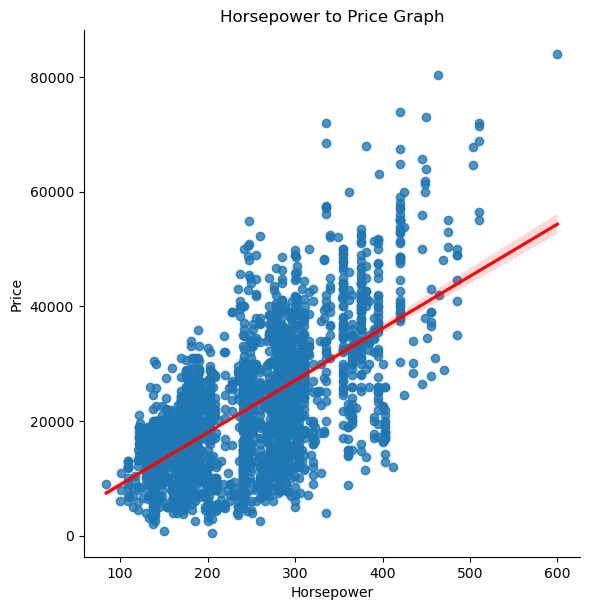

In [3]:
# visualization of horsepower compared to price in a relplot
f.horsepower_plot(train, 'horsepower','price')

In [4]:
# Pearsonr stats test to determine if the two variables are related.
f.pearson_test(train, 'horsepower')

The correlation between horsepower and price is: 0.64


## Takeaways:

- The stats test rejects the null therefore horsepower and price are related.
- In this graph we can see there is a positive correlation between horsepower and price.

## Does mileage affect price of the vehicle?
**Ho: The mileage and price of the vehicle are indpendent of each other.**  
**Ha: Mileage and price are related.**

- determine if mileage and price are related
- confidence interval of 95%
- alpha of .05

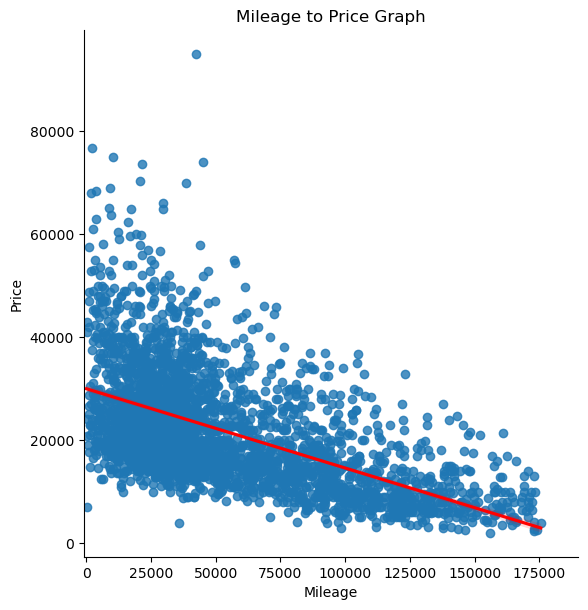

In [5]:
# visualizing the price of the vehicle based on mileage
f.mileage_plot(train, 'mileage', 'price')

In [6]:
# testing for a relationship between mileage and price
f.pearson_test(train, 'mileage')

The correlation between mileage and price is: -0.55


## Takeways:

- The stats test proves that there is a relationship between mileage and price of a vehicle.

## Do the dimensions of the vehcile affect price?
**Ho: The width and price of the vehicle are indpendent of each other.**  
**Ha: The width and price are related.**

- determine if width and price are related
- confidence interval of 95%
- alpha of .05

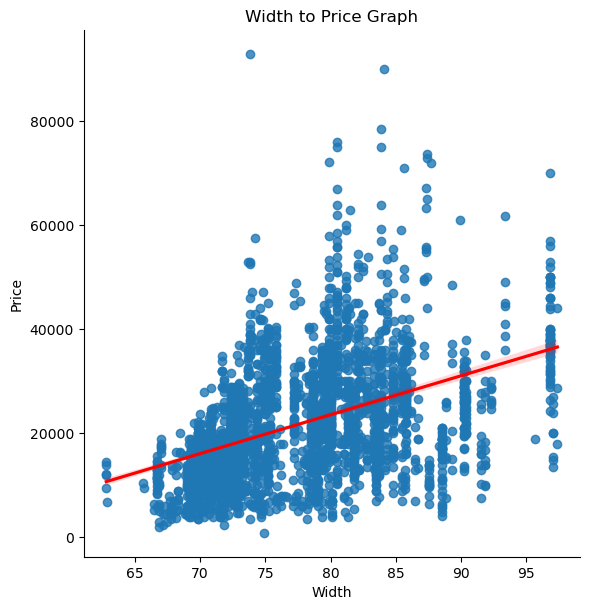

In [7]:
# visualizing the correlation between width and price
f.width_plot(train, 'width', 'price')

In [8]:
# testing for a relationship between width and price
f.pearson_test(train, 'width')

The correlation between width and price is: 0.44


**Ho: The length and price of the vehicle are indpendent of each other.**  
**Ha: Length and price are related.**

- determine if length and price are related
- confidence interval of 95%
- alpha of .05

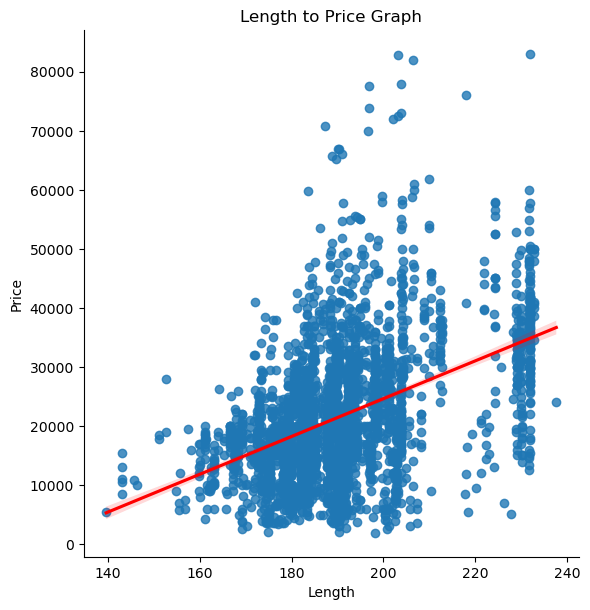

In [9]:
# visualizing the correlation between length and price
f.length_plot(train, 'length', 'price')

In [10]:
# testing for a relationship between length and price
f.pearson_test(train, 'length')

The correlation between length and price is: 0.44


## Takeways:

- The stats test proves that there is a relationship between width and price.
- The stats test proves that there is a relationship between length and price.

## Does whether the car is sold by a dealer affect price?
**Ho: A vehicle being sold by a dealer and price of the vehicle are indpendent of each other.**  
**Ha: A vehicle being sold by a dealer and price are related.**

- determine if width and price are related
- confidence interval of 95%
- alpha of .05

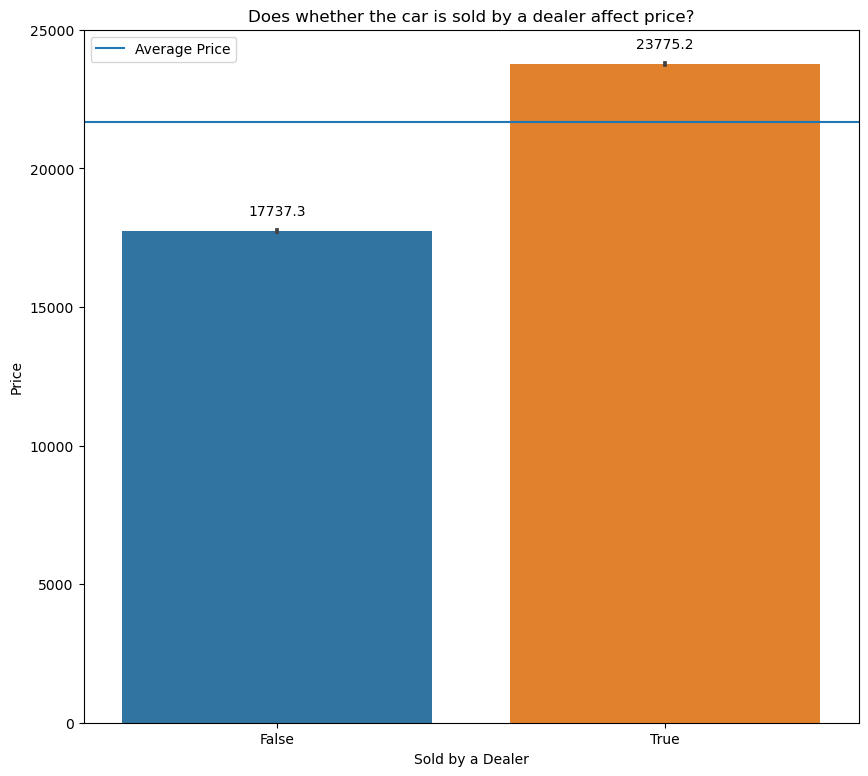

In [11]:
# visualization of the comparison between whether a car is sold by a dealer and price
f.dealer_plot(train, 'dealer', 'price')

In [12]:
# testing correlation between whether a vehicle is sold by a dealer and price
f.ttest_samp(train, 'dealer')

We reject null


## Takeaways
- The stats test proves there a correlation between whether a vehcile is sold by a dealer

## Exploration Summary
- Horsepower and price are positively correlated. As horsepower increases so does price.
- Mileage and power are negatively correlated. As mileage increases, price decreases.
- Width and Length are positively correlated to price. As the vehicle gets larger, the price increases.
- Whether a car being sold by a dealer affects price. The average price of vehicles are higher if they are sold by a dealer

# Modeling
- I will be using RMSE as the evaluation metric
- The baseline RMSE is 10888

In [13]:
# splitting data again and dropping columns not modeling with
X_train, y_train, X_val, y_val, X_test, y_test = f.split_scale(cars)

In [14]:
# creating prediction table
preds, baseline_rmse = f.preds_table(y_train)

In [15]:
# running Linear Regression model on X_train
preds, lm_rmse = f.linear_reg(X_train, y_train, preds)

RMSE: 5626.248483670091


In [16]:
# running Lasso Lars model on X_train
preds, lasso_rmse = f.lasso(X_train, y_train, preds)

RMSE: 5626.239241269429


In [17]:
# running Linear Regression model on Polynomial transformed X_train
preds, poly_rmse = f.lm_poly(X_train, y_train, preds)

RMSE: 4339.728793369466


In [18]:
# running Lasso Lars model on Polynomial transformed X_train
preds, lassopoly_rmse = f.lasso_poly(X_train, y_train, preds)

RMSE: 5100.27312994118


In [19]:
# running XGB Regressor model on X_train
preds, xgb_rmse = f.xgb_model(X_train, y_train, preds)

RMSE: 4075.496166112784


In [20]:
# creating data frame of all RMSE values
rmse_df = f.rmse_table(baseline_rmse, lm_rmse, lasso_rmse, poly_rmse, lassopoly_rmse, xgb_rmse)

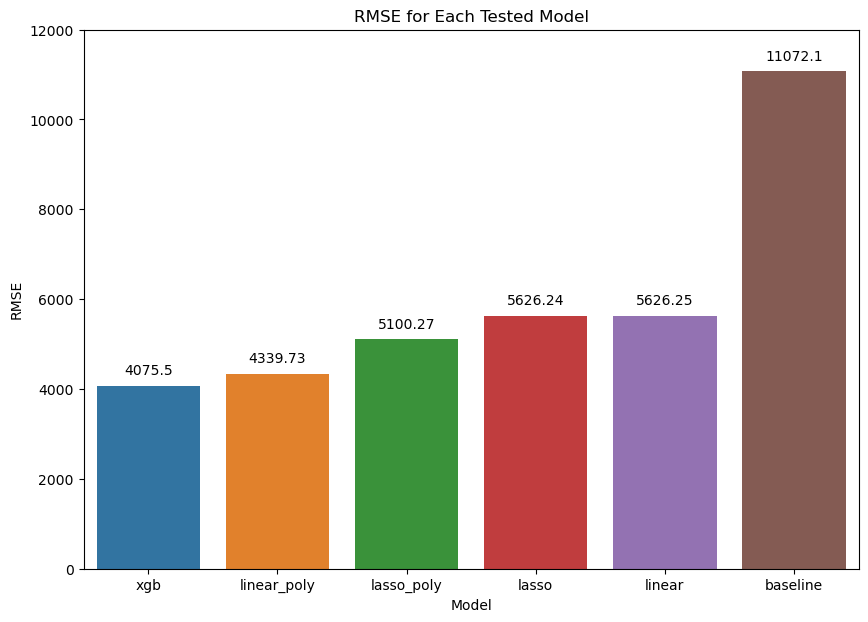

In [21]:
# graphing RMSE values
f.rmse_graph(rmse_df)

In [22]:
# running best 3 models on the X_val data set
val_preds = f.val_tests(X_train, y_train, X_val, y_val)

In [23]:
# creating data frame of RMSE values for Validate data set
val_rmse_df = f.val_rmse(val_preds)

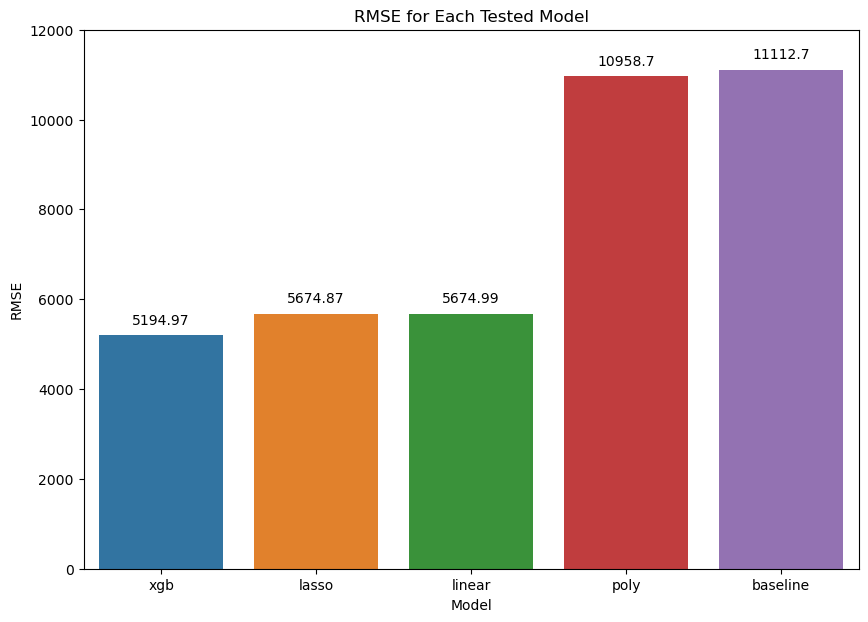

In [24]:
# plotting RMSE values
f.val_plot(val_rmse_df)

In [25]:
# running XGB Regressor on the test data set
f.test_set(X_train, y_train, X_test, y_test)

The final test RMSE is: 5230.21


## Modeling Summary
- All models out preformed the baseline
- The best model was the XGBRegressor model. With an RMSE of 5230

# Conclusions
## Exploration
- Horsepower and price are positively correlated. As horsepower increases so does price.
- Mileage and power are negatively correlated. As mileage increases, price decreases.
- Width and Length are positively correlated to price. As the vehicle gets larger, the price increases.
- Whether a car being sold by a dealer affects price. The average price of vehicles are higher if they are sold by a dealer

## Modeling
- The best model had an RMSE of 5230 on the test data set.
- The best model's RMSE is almost half of the baseline's RMSE values.

## Recommendations
- The most highest correlations to price were horsepower, mileage and year. However, the correlation between mileage and price was negative, though still high.
- These three features proved to be most effective at predicting price.

## Next Steps
- I would look into exploring how the wheelbase and year affected price.
- I would also look into gathering a more clean data set. 